# DS Course Recap

<img src="http://www.leadershipwithsass.com/wp-content/uploads/2010/08/RunningARaceResize.jpg"/>

We've gone over many techniques, ideas, topics, and applications throughout our 11 weeks. Your programming skills have strengthened (for some of you, you've gone literally from 0 to 60!), and you've developed a strong calculus of various algorithms. Let's do a recap:

----

** Basics ** - Before we can continue onto doing any kind of modeling, we first need to understand the data. What is the range of inputs and outputs? How are they distributed? Are there many NaN values? Infinity values? Are the "numbers" actually numbers, or are they string representations?

- Plotting
- Visualization
- Analysis
 

** Classification** - Classification is concerned with predicting the class, or category a target variable belongs to based on the input features.
- KNN
- Naive Bayes
- Logistic Regression
- SVM
- Decision Tree
- Bagging
- Random Forest
- Boosting

** Regression ** - Regression problems model the response as a continuous prediction based on a linear combination of its inputs.
- Linear Regression
- Ridge Regression
- LASSO Regression


** Unsupervised Methods ** - Clustering and dimensionality reduction methods attempt to describe the original data as a 'reduced' subset of the original data. In the case of K Means, the reduction is described by a number of centroids that points belong to. PCA/SVD both utilize matrix factorization techniques to discover a latent basis that describes the data in orthogonal bases.

- PCA
- SVD
- K Means

** Advanced Topics ** - The following topics are mainly applications or translations of techniques we have already learned.
- Recommendation Engines
- Neural networks (skflow)
- Time Series



# Analysis

- We should try to visualize pertinent variables as much as possible.
    - Scatter plots give a quick and dirty relationship between two variables by scattering their values
    - Heatmaps represent "hot" and "cool" areas between two variables by color representations of their values
    - Seaborn is the very pretty plotting tool we have been using throughout [Seaborn Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)

- Preprocessing
    - StandardScalar - We can use the StandardScaler to take our features, subtract the mean and divide them by the standard deviation. This forces all the variables to take on a similar scale, which is needed for many algorithms
    - One Hot Encoding / LabelBinarizer - In the case of categorical variables taking on many values, we can use One Hot Encoding (and/or LabelBinarizer) to transform the values into a matrix of 1's and 0's corresponding to which value they fall into

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load data and set it up as a dataframe
from sklearn import datasets
iris = datasets.load_iris()

iris_data = iris.data
iris_target = iris.target
iris_df = pd.DataFrame( iris_data,columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/brianchung/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


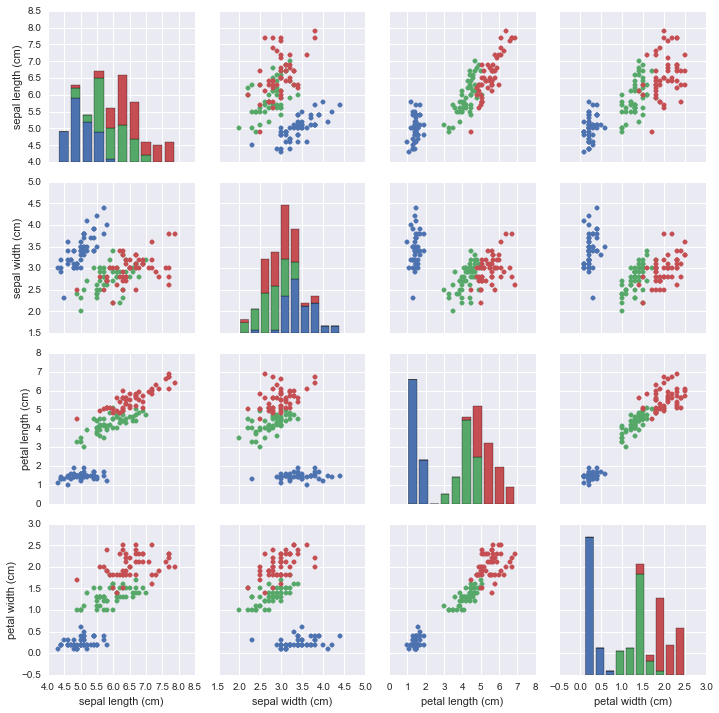

In [3]:
# Initial scatters
g = sb.PairGrid(iris_df,hue='species')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.ix[:,:-1],iris_df.ix[:,-1],test_size=.2)

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Classification Algorithms

## K Nearest Neighbors

- K Nearest Neighbors is a very quick and easy to use algorithm for classification. You must specify a `n_neighbors` parameter during construction
- During 'fitting', KNN merely stores a copy of the data
- During 'prediction', KNN finds the closest n_neighbors datapoints to the sample, and returns the max vote classes of these neighbors
- KNN turns out to be a fantastic model, but suffers tremendously from the curse of dimensionality. As more features are added, the distance from any two points increases exponentially, and locality is no longer preserved.

----

* Use KNN when you have few features and MANY data samples. 
* Don't use KNN when you have very sparse data.

In [7]:
from sklearn import neighbors

In [8]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [9]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [10]:
y_pred = model_knn.predict(X_train)

In [11]:
print "Train score:", model_knn.score(X_train,y_train)
print "Test score:",  model_knn.score(X_test,y_test)

Train score: 0.95
Test score: 0.966666666667


# Naive Bayes

- Naive Bayes takes a probabilistic view of the classification problem and models p(theta|y) as a generative model of p(y|theta) * p(theta).
- The class priors p(theta) can be modeled as a categorical distribution
- The likelihood model p(theta|y) can be modeled as a bernoulli, multinomial, or gaussian distribution. You may want to use a multinomial model for text count-features, and gaussian for continuous normally distributed features
- NB attempts to maximize the posterior probability of theta by taking a prior view on theta, and incorporating the data to revise these views.

---
- Use Naive Bayes with text based classification with a Multinomial, or with continuous data using the GaussianNB
- Use Naive Bayes when you believe features are relatively uncorrelated
- Don't use Naive Bayes when most of your features are similar (i.e independence of features is a STRONG assumption in Naive Bayes).

In [15]:
from sklearn import naive_bayes

In [16]:
model_nb = naive_bayes.GaussianNB()

In [17]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [18]:
print "Train score:", model_nb.score(X_train,y_train)
print "Test score:",  model_nb.score(X_test,y_test)

Train score: 0.958333333333
Test score: 1.0


## Logistic Regression

- Logistic Regression is an extension of linear regression to handle the case of classification
- We now model the probability of a class by taking the sigmoid of the linear combination of predictors.
- Alternatively, we predict the logit, or log odds of a class as a linear function of the predictors
- Logistic Regression can return probability values of a class in addition to its prediction of which class it belongs to (using the argmax of the probability values)
- LR makes no assumptions on independence of features
- LR requires regularization for well separated problems

-------
- Use Logistic Regression for a baseline in classification problems
- If you have many similar variables, make sure to tune your Logistic Regression model's hyperparameters 

In [19]:
from sklearn import linear_model

In [20]:
model_lr = linear_model.LogisticRegression()

In [21]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [22]:
y_pred = model_lr.predict(X_train)

In [23]:
print "Train score:", model_lr.score(X_train,y_train)
print "Test score:",  model_lr.score(X_test,y_test)

Train score: 0.916666666667
Test score: 0.966666666667


## Logistic Regression CV

In [24]:
model_lr_cv = linear_model.LogisticRegressionCV(Cs=500)

In [25]:
model_lr_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=500, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [26]:
print "Train score:", model_lr_cv.score(X_train,y_train)
print "Test score:",  model_lr_cv.score(X_test,y_test)

Train score: 0.933333333333
Test score: 0.966666666667


## Support Vector Machines

- Support Vector Machines are useful for finding highly nonlinear boundaries in the case of classification
- They do this by fitting a linear separating boundary within the kernel space
- Common kernels include the linear kernel (i.e. nothing special), rbf kernel (radial basis function - gaussian kernel), and exponential kernel (similar to fitting a polynomial in linear regression)
- There are two hyperparameters to tune for rbf kernel: C (the cost of misclassified errors) and eta (the bandwidth of the gaussian function)


------
- Use SVM's when you believe the classes are not linearly separated in regular feature space
- Don't use SVMs when you have an extremely large amount of data (mainly due to computational time requires)
- DO tune the hyperparameters. A well tuned SVM performs pretty well.

In [27]:
from sklearn import svm

In [28]:
model_svm = svm.SVC()

In [29]:
model_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = model_svm.predict(X_train)

In [31]:
print "Train score:", model_svm.score(X_train,y_train)
print "Test score:",  model_svm.score(X_test,y_test)

Train score: 0.966666666667
Test score: 0.966666666667


## Decision Trees

- Decision Trees classify samples by creating a set of rules in the form of a tree
- During prediction, the rules are sequentially applied to a new sample until the sample arrives at some leaf node in the tree
- Decision trees will absolutely overfit and be prone to high variance unless the max_depth is reduced


------
- Generally, don't use a decision tree by itself unless you tune the max_depth and splitting decisions through cross validation
- A single decision tree will provide you with a lot of intuition, but is not very useful for prediction.
- Use bagging, random forest, and boosting to provide a lot less variance and better generalization error

In [32]:
from sklearn import tree

In [33]:
model_dtree = tree.DecisionTreeClassifier()

In [34]:
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [35]:
print "Train score:", model_dtree.score(X_train,y_train)
print "Test score:",  model_dtree.score(X_test,y_test)

Train score: 1.0
Test score: 1.0


## Bagging

- Bagging is the first of many decision tree (and non decision tree!) based ensemble techniques
- Bagging takes the original data, obtains random samples from it with replacement, and uses these "new" datasets to fit a model.
- By fitting many models based off the original dataset, we can average/argmax over them to get lower variance predictions


----
- Use Bagging as a baseline for ensemble methods. Random forest and boosting tend to work better overall.

In [36]:
from sklearn import ensemble

In [37]:
model_bag = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                       n_estimators=50)

In [38]:
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0)

In [47]:
print "Train score:", model_bag.score(X_train,y_train)
print "Test score:",  model_bag.score(X_test,y_test)

Train score: 1.0
Test score: 1.0


## Random Forest

- Random forest takes bagging one step further by also randomizing the subset of features used to split the trees.
- Even with creating randomized variations of the original dataset, if we use all the features to split like in the case of bagging, we will still often end up with very correlated trees.
- Forcing the models to used randomized features reduces the correlations of the trees, and creates more diversity in the ensemble.

-----
- Use random forest when you want to use a ensemble technique but also want to use decision trees as your base classifier (i.e. no such thing as random forest based off of SVM)
- If you want to use a different kind of base classifier, use a boosting model

In [48]:
model_rf = ensemble.RandomForestClassifier(n_estimators=100)

In [49]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
print "Train score:", model_rf.score(X_train,y_train)
print "Test score:",  model_rf.score(X_test,y_test)

Train score: 1.0
Test score: 1.0


## Boosting

- Boosting is different from bagging / random forest in that it is a _sequential_ ensemble technique.
- At each stage, boosting fits a model and gives each sample a weight. The model gets a weight based on the prediction performance, and each individual sample is reweighted based on whether the model got that sample correct or not.
- Future stages focus more on these incorrect samples.
- Boosting can use any base classifier


----
- Generally, boosting outperforms random forest, HOWEVER, it requires much more parameter tuning. i.e. how many classifiers should be used, the learning rate, which base classifier
- Use Boosting for ensemble techniques, but be warned that it can take a lot longer because of the serial nature of the algorithm

In [51]:
model_boost = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(),
                                          n_estimators=100)

In [52]:
model_boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [53]:
print "Train score:", model_boost.score(X_train,y_train)
print "Test score:",  model_boost.score(X_test,y_test)

Train score: 1.0
Test score: 1.0


# Regression Problems

In [54]:
diabetes = datasets.load_diabetes()
diabetes_data = diabetes.data
diabetes_target = diabetes.target
diabetes_df = pd.DataFrame(
    np.hstack((diabetes_data,diabetes_target.reshape((diabetes_data.shape[0],1)))))
diabetes_df.columns=['feature_'+ str(x) for x in range(10)] + ['target']

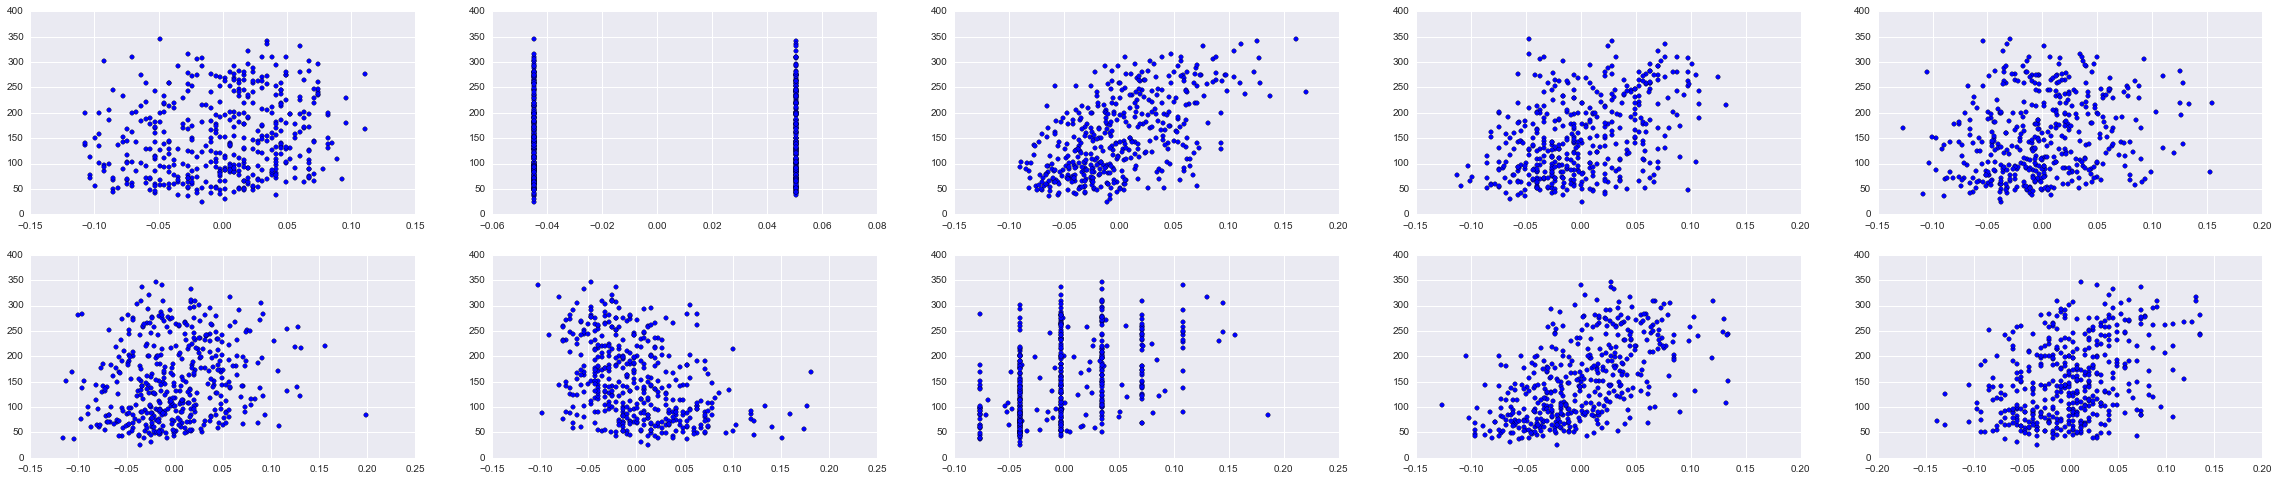

In [55]:
plt.figure(figsize=(40,8))

for idx in range(10):
    plt.subplot(2,5,idx+1)
    plt.scatter( diabetes_df["feature_"+str(idx)], diabetes['target'])


In [56]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.ix[:,:-1],diabetes_df.ix[:,-1],test_size=.2)

In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Linear Regression

- The mainstay of continuous prediction problems, linear regression is a good first technique to try
- Linear regression models the output as a linear sum of the input variables

----
- Use linear regression as a first pass
- Don't use linear regression when the output really is not a linear combination of the inputs
- You may need to 'feature engineer', by creating polynomials of the inputs or reformulate the inputs
- If your features are very correlated, make sure to use Ridge or LASSO instead

In [58]:
model_lin = linear_model.LinearRegression()

In [59]:
model_lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
y_pred = model_lin.predict(X_train)

In [61]:
print "Train score:", model_lin.score(X_train,y_train)
print "Test score:",  model_lin.score(X_test,y_test)

Train score: 0.5336613022
Test score: 0.446381297611


## Ridge Regression CV

- Ridge regression adds a regularization term to linear regression by downweighting the feature beta values. 
- The parameter values are reduced equally in a latent space (think SVD)


---
- Use ridge regression when your input variables are correlated
- You must perform hyperparameter selection to determine the optimal regularization strength

In [62]:
model_ridge = linear_model.RidgeCV()

In [63]:
model_ridge.fit(X_train,y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [64]:
print "Train score:", model_ridge.score(X_train,y_train)
print "Test score:",  model_ridge.score(X_test,y_test)

Train score: 0.531185900574
Test score: 0.445225037449


## Lasso CV

- LASSO adds a regularization term to linear regression that also downweights the feature beta values
- Unlike ridge regression, LASSO also can zero out certain features and perform implicit feature selection

------
- Use LASSO when your input features are correlated
- Like ridge, you'll have to perform hyperparameter selection to select the optimal strength
- Ridge vs. LASSO? Try both--one will perform better than the other depending on the problem structure itself

In [65]:
model_lasso = linear_model.LassoCV()

In [66]:
model_lasso.fit(X_train,y_train)

/Users/brianchung/anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:424: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [67]:
print "Train score:", model_lasso.score(X_train,y_train)
print "Test score:",  model_lasso.score(X_test,y_test)

Train score: 0.529607837612
Test score: 0.44284406995


# Unsupervised Learning Techniques

In [68]:
digits = datasets.load_digits()
digits_data = digits.data
digits_target = digits.target
digits_data.shape

(1797, 64)

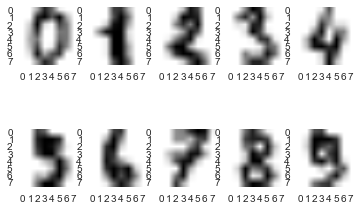

In [69]:
digits_and_labels = zip(digits_data,digits_target)
for idx, (img,lbl) in enumerate(digits_and_labels[:10]):
    plt.subplot(2,5,idx+1)
    plt.imshow(img.reshape((8,8)),cmap=plt.cm.gray_r)
    plt.grid('off')

# PCA ( Principal Components Analysis)

- PCA is the eigendecomposition of the covariance matrix of the data matrix X
- The covariance matrix of X describes how each of the features correlate with each other.
- The eigendecomposition of the covariance matrix redescribes the covariance matrix in terms of orthogonal bases
- We can choose a subset of the bases to create a "reduced" set of features. Note that this reduces the number of "latent features" but does not reduce the physical number of features. If your original matrix is 100 x 10, after performing PCA, your reduced matrix will still be 100 x 10.

-----
- Use PCA when the original data could be represented as a linear combination of the data features
- DONT use PCA when this is not the case. The SKLearn API has many alternate techniques such as Kernel PCA or Isomap for non-linear dimensionality reduction

In [70]:
from sklearn import decomposition

In [71]:
model_pca = decomposition.PCA(n_components=10)

In [72]:
model_pca.fit(digits_data)

PCA(copy=True, n_components=10, whiten=False)

In [73]:
digits_red = model_pca.transform(digits_data)

In [74]:
digits_rec = model_pca.inverse_transform( digits_red )

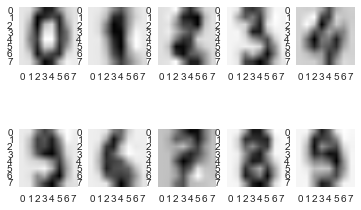

In [75]:
digits_and_labels = zip(digits_rec,digits_target)
for idx, (img,lbl) in enumerate(digits_and_labels[:10]):
    plt.subplot(2,5,idx+1)
    plt.imshow(img.reshape((8,8)),cmap=plt.cm.gray_r)
    plt.grid('off')

# SVD ( Singular Value Decomposition )

- SVD is a numerical technique that performs the same operations as PCA. In fact, PCA is often implemented through SVD. 

In [76]:
model_svd = decomposition.TruncatedSVD(n_components=10)

In [77]:
model_svd.fit(digits_data)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0)

In [78]:
digits_red = model_svd.transform(digits_data)

In [79]:
digits_rec = model_svd.inverse_transform( digits_red )

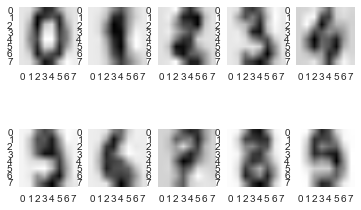

In [80]:
digits_and_labels = zip(digits_rec,digits_target)
for idx, (img,lbl) in enumerate(digits_and_labels[:10]):
    plt.subplot(2,5,idx+1)
    plt.imshow(img.reshape((8,8)),cmap=plt.cm.gray_r)
    plt.grid('off')

# K Means Clustering

- K Means clustering creates n_clusters number of centroids
- These centroids are defined as the mean values of the closest points to it
- How do you choose the number of centroids? This is often problem centric. For instance, in the case of 'digits', we know there are 10 unique digits, so we might want to choose 10 centroids. Or if you are a clothing designer with data on people's shirt width and heights, you might choose 3 clusters for "small", "medium", and "large" sizes
- Alternatively, you can plot the within cluster sum of squared distances and between cluster sum squared distances as a function of number of clusters.

In [81]:
from sklearn import cluster

In [82]:
model_km = cluster.KMeans(n_clusters=10)

In [83]:
model_km.fit(digits_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

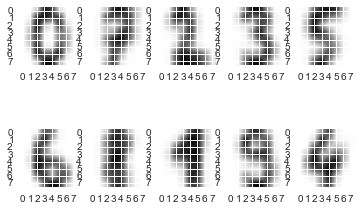

In [84]:
for idx in range(model_km.cluster_centers_.shape[0]):
    plt.subplot(2,5,idx+1)
    plt.imshow(model_km.cluster_centers_[idx].reshape((8,8)))

# Advanced Topics

## Recommendation Systems

- Content based recommendation systems map the items onto a feature space. Users are also mapped to this feature space. The dot product of users and items provides a list of recommendations.
- Collaborative based filtering systems either use similiarity matrices created through correlations, jaccard similarities, or cosine similarity to create a item x item matrix of similar items. If a user likes a certain item, the similarity matrix shows the n closest items to recommend.

In [85]:
twitter_data = pd.read_csv('../16_recommendation/user-brands.csv')
twitter_data.head()

,id,brand
0,80002,Target
1,80002,Home Depot
2,80010,Levi's
3,80010,Puma
4,80010,Cuisinart


In [86]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23804 entries, 0 to 23803
Data columns (total 2 columns):
id       23804 non-null int64
brand    23804 non-null object
dtypes: int64(1), object(1)
memory usage: 557.9+ KB


In [87]:
twitter_tbl = pd.pivot_table(data=twitter_data,index="id",columns="brand",aggfunc="size",fill_value=0)
twitter_tbl.head()

brand,6pm.com,Abercrombie & Fitch,Adidas,Aeropostale,Aldo,All Saints,Amazon.com,American Apparel,American Eagle,Ann Taylor,...,Walgreens,Walk-Over,Wet Seal,Windsor,YSL,Yves Saint Laurent,ZOO,Zara,Zipcar,vineyard vines
id,,,,,,,,,,,,,,,,,,,,,
80002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
def jaccard_distance(M):
    n_brands = M.shape[1]
    I = M.T.dot(M)  # number of users in common 
    n_users_per_brand = np.diag(I)
    N = n_users_per_brand.reshape(n_brands, 1) * np.ones(n_brands)
    U = N + N.T - I  # total unique followers = n_users_i + n_users_j - users in common
    J = I / U.astype(float)  # similarity matrix
    D = 1.0 - J  # distance
    return D

In [89]:
brand_dist = jaccard_distance(twitter_tbl)

In [94]:
brand_dist['Adidas'].sort_values(ascending=False)

brand
vineyard vines                1.000000
Hollister                     1.000000
Joseph Abboud                 1.000000
John Varvatos                 1.000000
Joe Fresh                     1.000000
Janie and Jack                1.000000
JC Penney                     1.000000
J Jill                        1.000000
Hugo Boss                     1.000000
Hard Tail                     1.000000
Forum                         1.000000
Hanky Panky                   1.000000
H&M                           1.000000
Gymboree                      1.000000
BCBGeneration                 1.000000
Grand                         1.000000
Giorgio Armani                1.000000
BUCKLE                        1.000000
Journeys                      1.000000
Juicy Couture                 1.000000
Justice                       1.000000
Karmaloop                     1.000000
Apple                         1.000000
Lord & Taylor                 1.000000
Life is good                  1.000000
Armani             

## Neural Networks

- Neural Networks are a graph based method of creating highly nonlinear boundaries for the purpose of classification (as well as regression).
- Neural networks contain layers specified by an input layer, a number of hidden layers, and an output layer.
- SKFlow provides a wrapper around TensorFlow, where you can specify the number as well as size of hidden layers

----
- Use neural networks after trying other classification techniques first. DNN (Deep neural networks) require significant tuning and computational power to yield significant improvements.


In [95]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,digits_target,test_size=.2)

In [96]:
import skflow

In [97]:
model_dnn = skflow.TensorFlowDNNClassifier(hidden_units=[10,20,10],n_classes=10,steps=5000)

In [98]:
model_dnn.fit(X_train,y_train)

Step #1, avg. loss: 5.07362
Step #501, epoch #11, avg. loss: 0.76294
Step #1001, epoch #22, avg. loss: 0.21372
Step #1501, epoch #33, avg. loss: 0.12989
Step #2001, epoch #44, avg. loss: 0.09446
Step #2501, epoch #55, avg. loss: 0.07694
Step #3001, epoch #66, avg. loss: 0.05182
Step #3501, epoch #77, avg. loss: 0.05959
Step #4001, epoch #88, avg. loss: 0.03879
Step #4501, epoch #100, avg. loss: 0.02075


TensorFlowDNNClassifier(batch_size=32, class_weight=None,
            continue_training=False, early_stopping_rounds=None,
            hidden_units=[10, 20, 10], keep_checkpoint_every_n_hours=10000,
            learning_rate=0.1, max_to_keep=5, n_classes=10, num_cores=4,
            optimizer='SGD', steps=5000, tf_master='', tf_random_seed=42,
            verbose=1)

In [99]:
print "Train Score:", model_dnn.score(X_train,y_train)
print "Test Score:",  model_dnn.score(X_test,y_test)

Train Score: 0.999304105776
Test Score: 0.969444444444


## Time Series

- Most data we have used has been _cross-sectional_ in nature. The data was assumed to not have significant time effects.
- Time series on the other hand, concerns itself with the time components of seasonality and trends.

- Use resampling, rolling\_\*, and diff to obtain smoothed versions of the original data
- Use autocorr on series to determine correlations of the original time series with lagged variants


In [100]:
import pandas.io.data as web
import datetime

/Users/brianchung/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [101]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2014, 12,31)
stocks = ['GOOG','AAPL'] #Google and Apple
f = web.DataReader(stocks, 'yahoo', start, end)

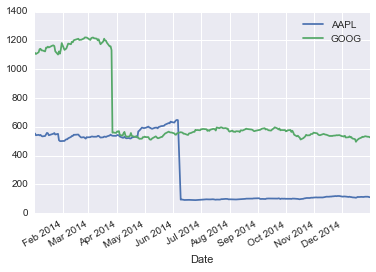

In [102]:
f.Close.plot()

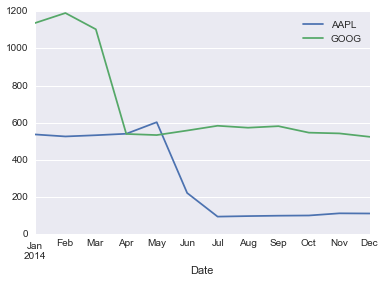

In [103]:
f.Close.resample("M",how="mean").plot()

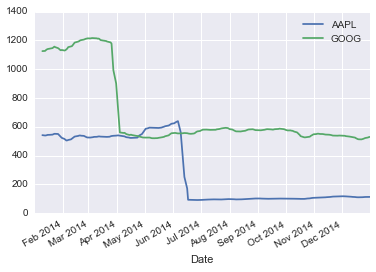

In [104]:
pd.rolling_mean( f.Close, window=7 ).plot()

In [106]:
f.Close['AAPL'].autocorr(lag=1)

0.98768956706722333